In [1]:
import os 
import numpy as np
import pandas as pd
import scipy.io
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
from neo.core import SpikeTrain
from quantities import ms, s, Hz
from elephant.statistics import mean_firing_rate
from elephant.statistics import time_histogram, instantaneous_rate
from elephant.kernels import GaussianKernel

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
file_to_use = 'C:\\Users\\David\\Desktop\\IDIBAPS\\Tiffany\\data.csv'

In [4]:
df = pd.read_csv(file_to_use, sep=',', index_col=0)

In [5]:
df

,cluster_id,fixed_times,trial,Delay_ON,Delay_OFF,Delay_length,Stimulus_ON,Response_ON,START,END,a_Stimulus_ON,a_Delay_ON,a_Delay_OFF,a_Response_ON,vector_answer,reward_side,hit
0,1193,88.264567,1,89.061367,89.161400,0.100033,88.661367,89.361400,88.161367,95.522933,-0.396800,-0.796800,-0.896833,-1.096833,0,0.0,1.0
1,1193,88.419400,1,89.061367,89.161400,0.100033,88.661367,89.361400,88.161367,95.522933,-0.241967,-0.641967,-0.742000,-0.942000,0,0.0,1.0
2,1193,88.453467,1,89.061367,89.161400,0.100033,88.661367,89.361400,88.161367,95.522933,-0.207900,-0.607900,-0.707933,-0.907933,0,0.0,1.0
3,1193,88.669733,1,89.061367,89.161400,0.100033,88.661367,89.361400,88.161367,95.522933,0.008367,-0.391633,-0.491667,-0.691667,0,0.0,1.0
4,1193,88.820100,1,89.061367,89.161400,0.100033,88.661367,89.361400,88.161367,95.522933,0.158733,-0.241267,-0.341300,-0.541300,0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265735,943,2626.225300,222,2622.972567,2625.972633,3.000067,2622.572567,2626.172633,2622.072567,NaN,3.652733,3.252733,0.252667,0.052667,0,1.0,0.0
265736,943,2626.795500,222,2622.972567,2625.972633,3.000067,2622.572567,2626.172633,2622.072567,NaN,4.222933,3.822933,0.822867,0.622867,0,1.0,0.0
265737,943,2627.401300,222,2622.972567,2625.972633,3.000067,2622.572567,2626.172633,2622.072567,NaN,4.828733,4.428733,1.428667,1.228667,0,1.0,0.0
265738,943,2628.004167,222,2622.972567,2625.972633,3.000067,2622.572567,2626.172633,2622.072567,NaN,5.431600,5.031600,2.031533,1.831533,0,1.0,0.0


In [6]:
df.cluster_id.unique()

array([1193, 1794, 1215,  301, 1402, 1621,  294, 1542, 1548, 1759, 1574,
        474, 1708, 1713,  785, 1791, 1399, 1406, 1441, 1097, 1430, 1386,
       1611, 1761, 1375, 1749, 1145, 1688, 1709, 1479, 1035, 1073, 1380,
       1763, 1352, 1231, 1698, 1788, 1225,   21,  231, 1766,  578,  606,
       1203,  943,  648,  895,  590,  520, 1426, 1540, 1774,  909],
      dtype=int64)

In [162]:
N = 1794
T = 2
############################################################ Select neuron and trial
nx = df.loc[df['cluster_id']==N]
nxt = nx.loc[nx['trial']==T]
############################################################ Get the times of the spikes
times_spikes = nxt.fixed_times.values
times_spikes = times_spikes*1000 #transform to ms
############################################################ Set the strat and end time of the train
stop_time =  nxt.END.unique()[0]*1000*ms ## End of the trial in ms
start_time = nxt.START.unique()[0]*1000*ms ## Start of the trial in ms
############################################################ Spiketrain
spiketrain = SpikeTrain(times_spikes, units=ms, t_stop=stop_time, t_start=start_time) 
############################################################ Convoluted firing rate
histogram_rate = time_histogram([spiketrain], 100*ms, output='rate')
inst_rate = instantaneous_rate(spiketrain, sampling_period=25*ms) ##change the sampling period to change the resolution
times_ = inst_rate.times.rescale(ms)
firing= inst_rate.rescale(histogram_rate.dimensionality).magnitude.flatten()
############################################################ Dataframe 
df_trial = pd.DataFrame({'times':times_, 'firing':firing}) #dataframe con times y firing
df_trial['trial']=T
df_trial['neuron']=N
df_trial['Delay_ON']= nxt.Delay_ON.unique()[0]*1000
df_trial['Delay_OFF']= nxt.Delay_OFF.unique()[0]*1000
df_trial['Stimulus_ON']= nxt.Stimulus_ON.unique()[0]*1000
df_trial['Response_ON']= nxt.Response_ON.unique()[0]*1000
df_trial['START']= nxt.START.unique()[0]*1000
df_trial['END']= nxt.END.unique()[0]*1000

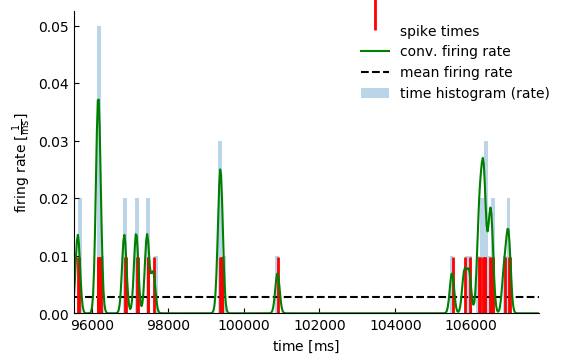

In [163]:
plt.figure(dpi=100) #dpi=150

# plotting the spikes
plt.plot(spiketrain, [0]*len(spiketrain), 'r', marker=2, ms=40, markeredgewidth=2, lw=0, label='spike times')

# mean firing rate
plt.hlines(mean_firing_rate(spiketrain), xmin=spiketrain.t_start, xmax=spiketrain.t_stop, linestyle='--', label='mean firing rate')

# time histogram
plt.bar(histogram_rate.times, histogram_rate.magnitude.flatten(), width=histogram_rate.sampling_period, align='edge', alpha=0.3, label='time histogram (rate)')


# convoluted firing rate
plt.plot(inst_rate.times.rescale(ms), inst_rate.rescale(histogram_rate.dimensionality).magnitude.flatten(), color='g', label='conv. firing rate')


# axis labels and legend
plt.xlabel('time [{}]'.format(spiketrain.times.dimensionality.latex))
plt.ylabel('firing rate [{}]'.format(histogram_rate.dimensionality.latex))
plt.xlim(spiketrain.t_start, spiketrain.t_stop)
plt.legend( frameon=False, bbox_to_anchor=(1.05, 1))
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.show()

In [159]:
df_trial

,firing,times,trial,neuron,Delay_ON,Delay_OFF,Stimulus_ON,Response_ON,START,END
0,3.362203e-03,95532.933333,2,1794,96432.933333,99433.0,96032.933333,99633.0,95532.933333,107790.966667
1,6.280307e-03,95557.933333,2,1794,96432.933333,99433.0,96032.933333,99633.0,95532.933333,107790.966667
2,9.765606e-03,95582.933333,2,1794,96432.933333,99433.0,96032.933333,99633.0,95532.933333,107790.966667
3,1.264571e-02,95607.933333,2,1794,96432.933333,99433.0,96032.933333,99633.0,95532.933333,107790.966667
4,1.363996e-02,95632.933333,2,1794,96432.933333,99433.0,96032.933333,99633.0,95532.933333,107790.966667
...,...,...,...,...,...,...,...,...,...,...
485,-1.368453e-18,107657.933333,2,1794,96432.933333,99433.0,96032.933333,99633.0,95532.933333,107790.966667
486,-1.184238e-18,107682.933333,2,1794,96432.933333,99433.0,96032.933333,99633.0,95532.933333,107790.966667
487,2.664535e-19,107707.933333,2,1794,96432.933333,99433.0,96032.933333,99633.0,95532.933333,107790.966667
488,-9.424560e-19,107732.933333,2,1794,96432.933333,99433.0,96032.933333,99633.0,95532.933333,107790.966667


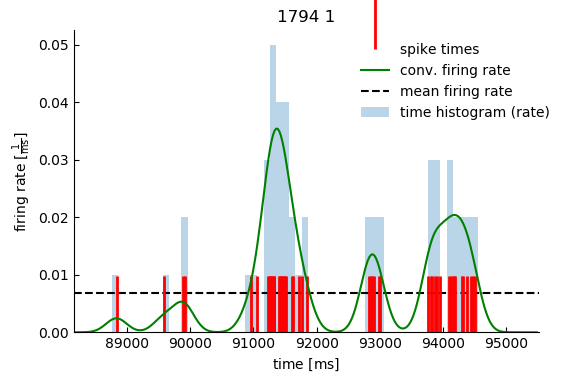

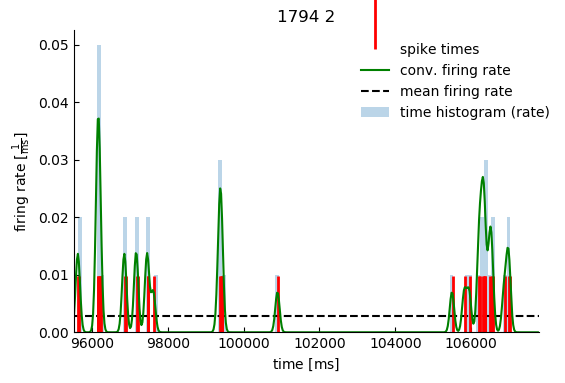

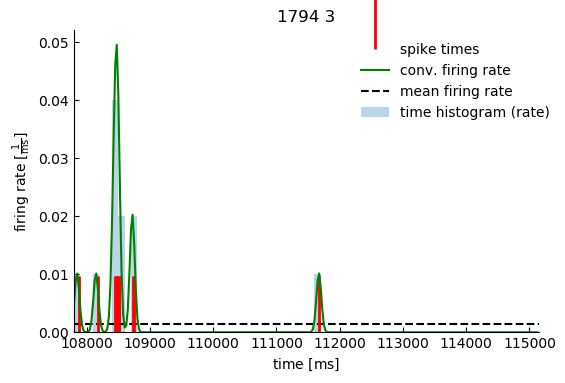

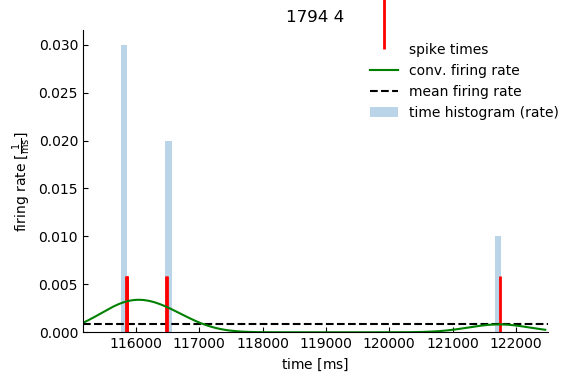

ValueError: zero-size array to reduction operation minimum which has no identity

In [166]:
N = 1794
#T = 2
############################################################ Select neuron and trial
nx = df.loc[df['cluster_id']==N]

frames=[]
for T in nx.trial.unique():
    nxt = nx.loc[nx['trial']==T]
    ############################################################ Get the times of the spikes
    times_spikes = nxt.fixed_times.values
    times_spikes = times_spikes*1000 #transform to ms
    ############################################################ Set the strat and end time of the train
    stop_time =  nxt.END.unique()[0]*1000*ms ## End of the trial in ms
    start_time = nxt.START.unique()[0]*1000*ms ## Start of the trial in ms
    ############################################################ Spiketrain
    spiketrain = SpikeTrain(times_spikes, units=ms, t_stop=stop_time, t_start=start_time) 
    ############################################################ Convoluted firing rate
    histogram_rate = time_histogram([spiketrain], 100*ms, output='rate')
    inst_rate = instantaneous_rate(spiketrain, sampling_period=25*ms) ##change the sampling period to change the resolution
    times_ = inst_rate.times.rescale(ms)
    firing= inst_rate.rescale(histogram_rate.dimensionality).magnitude.flatten()
    ############################################################ Dataframe 
    df_trial = pd.DataFrame({'times':times_, 'firing':firing}) #dataframe con times y firing
    df_trial['trial']=T
    df_trial['neuron']=N
    df_trial['Delay_ON']= nxt.Delay_ON.unique()[0]*1000
    df_trial['Delay_OFF']= nxt.Delay_OFF.unique()[0]*1000
    df_trial['Stimulus_ON']= nxt.Stimulus_ON.unique()[0]*1000
    df_trial['Response_ON']= nxt.Response_ON.unique()[0]*1000
    df_trial['START']= nxt.START.unique()[0]*1000
    df_trial['END']= nxt.END.unique()[0]*1000
    frames.append(df_trial)
    ############################################################## PLOT
    plt.figure(dpi=100) #dpi=150
    # plotting the spikes
    plt.plot(spiketrain, [0]*len(spiketrain), 'r', marker=2, ms=40, markeredgewidth=2, lw=0, label='spike times')
    # mean firing rate
    plt.hlines(mean_firing_rate(spiketrain), xmin=spiketrain.t_start, xmax=spiketrain.t_stop, linestyle='--', label='mean firing rate')
    # time histogram
    plt.bar(histogram_rate.times, histogram_rate.magnitude.flatten(), width=histogram_rate.sampling_period, align='edge', alpha=0.3, label='time histogram (rate)')
    # convoluted firing rate
    plt.plot(inst_rate.times.rescale(ms), inst_rate.rescale(histogram_rate.dimensionality).magnitude.flatten(), color='g', label='conv. firing rate')
    # axis labels and legend
    plt.xlabel('time [{}]'.format(spiketrain.times.dimensionality.latex))
    plt.ylabel('firing rate [{}]'.format(histogram_rate.dimensionality.latex))
    plt.xlim(spiketrain.t_start, spiketrain.t_stop)
    plt.legend( frameon=False, bbox_to_anchor=(1.05, 1))
    plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
    plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
    plt.gca().get_xaxis().tick_bottom()                                                                                         
    plt.gca().get_yaxis().tick_left()
    plt.gca().tick_params(direction='in') #direction
    plt.title(str(N)+' '+str(T))
    plt.show()
    

In [55]:
stop_time =  nxt.END.unique()[0]*1000*ms ## End of the trial in ms
start_time = nxt.START.unique()[0]*1000*ms ## Start of the trial in ms

In [56]:
start_time

array(88161.36666667) * ms

In [66]:
len(times_spikes) / 7

7.142857142857143

In [65]:
stop_time- start_time

array(7361.56666667) * ms

In [57]:
spiketrain1 = SpikeTrain(times_spikes, units=ms, t_stop=stop_time, t_start=start_time) #spiketrain

In [58]:
histogram_rate = time_histogram([spiketrain1], 2*ms, output='rate') ##sampling rate de 2ms (bining) for example, increase for less temporal resolution

In [94]:
## get firing rate continuos
inst_rate = instantaneous_rate(spiketrain1, sampling_period=25*ms)
times_ = inst_rate.times.rescale(ms)
firing= inst_rate.rescale(histogram_rate.dimensionality).magnitude.flatten()

df_trial = pd.DataFrame({'times':times_, 'firing':firing}) #dataframe con times y firing

In [95]:
df_trial

,firing,times
0,5.789192e-07,88161.366667
1,1.066875e-06,88186.366667
2,1.920920e-06,88211.366667
3,3.379135e-06,88236.366667
4,5.807670e-06,88261.366667
...,...,...
289,3.637979e-18,95386.366667
290,0.000000e+00,95411.366667
291,-3.031649e-19,95436.366667
292,9.094947e-19,95461.366667


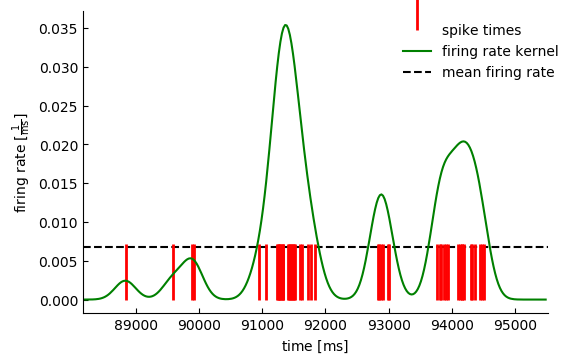

In [96]:
plt.figure(dpi=100) #dpi=150

# plotting the original spiketrain
plt.plot(spiketrain1, [0]*len(spiketrain1), 'r', marker=2, ms=40, markeredgewidth=2, lw=0, label='spike times')

# mean firing rate
plt.hlines(mean_firing_rate(spiketrain1), xmin=spiketrain1.t_start, xmax=spiketrain1.t_stop, linestyle='--', label='mean firing rate')

# convoluted firing rate
plt.plot(inst_rate.times.rescale(ms), inst_rate.rescale(histogram_rate.dimensionality).magnitude.flatten(), color='g', label='firing rate kernel')




# axis labels and legend
plt.xlabel('time [{}]'.format(spiketrain1.times.dimensionality.latex))
plt.ylabel('firing rate [{}]'.format(histogram_rate.dimensionality.latex))
plt.xlim(spiketrain1.t_start, spiketrain1.t_stop)
plt.legend( frameon=False, bbox_to_anchor=(1.05, 1))
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.show()